In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


In [13]:
df = pd.read_csv("data/accepted_2007_to_2018.csv", nrows=200000)

df.head()


C:\Users\Anmol Srivastava\AppData\Local\Temp\ipykernel_10780\3919496610.py:1: DtypeWarning: Columns (19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/accepted_2007_to_2018.csv", nrows=200000)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isnull().mean().sort_values(ascending=False).head(25)


member_id                                     1.000000
sec_app_num_rev_accts                         1.000000
sec_app_open_act_il                           1.000000
sec_app_inq_last_6mths                        1.000000
sec_app_open_acc                              1.000000
sec_app_mort_acc                              1.000000
sec_app_mths_since_last_major_derog           1.000000
sec_app_collections_12_mths_ex_med            1.000000
sec_app_chargeoff_within_12_mths              1.000000
sec_app_fico_range_low                        1.000000
sec_app_earliest_cr_line                      1.000000
sec_app_revol_util                            1.000000
sec_app_fico_range_high                       1.000000
revol_bal_joint                               1.000000
desc                                          0.999945
dti_joint                                     0.997455
verification_status_joint                     0.997445
annual_inc_joint                              0.997445
orig_proje

In [4]:
df[['loan_amnt','int_rate','annual_inc','dti']].describe()


,loan_amnt,int_rate,annual_inc,dti
count,200000.000000,200000.000000,2.000000e+05,199998.000000
mean,15278.155750,12.361763,7.815081e+04,19.164467
std,8651.134393,4.242099,8.051362e+04,9.157581
min,1000.000000,5.320000,0.000000e+00,0.000000
25%,8500.000000,9.170000,4.757550e+04,12.540000
50%,14000.000000,12.290000,6.500000e+04,18.610000
75%,20000.000000,14.650000,9.340000e+04,25.410000
max,35000.000000,28.990000,9.000000e+06,999.000000


In [15]:
df['loan_status'].value_counts().head(10)


loan_status
Fully Paid            140992
Charged Off            35090
Current                22637
Late (31-120 days)       785
In Grace Period          347
Late (16-30 days)        148
Default                    1
Name: count, dtype: int64

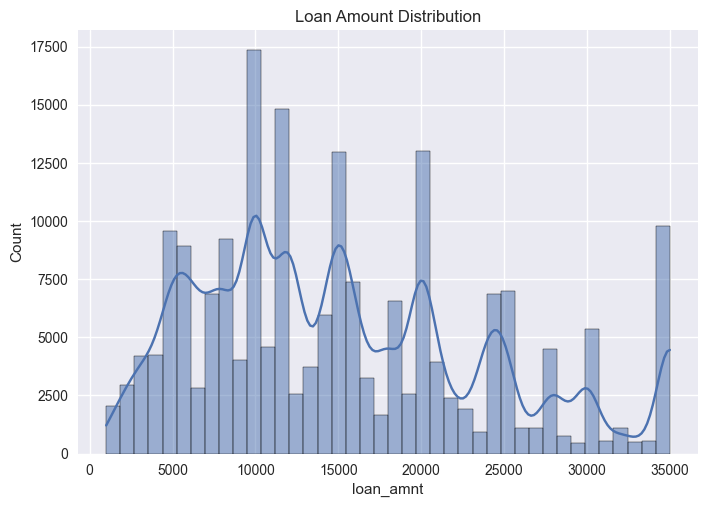

In [16]:
sns.histplot(df['loan_amnt'], bins=40, kde=True)
plt.title("Loan Amount Distribution")
plt.show()


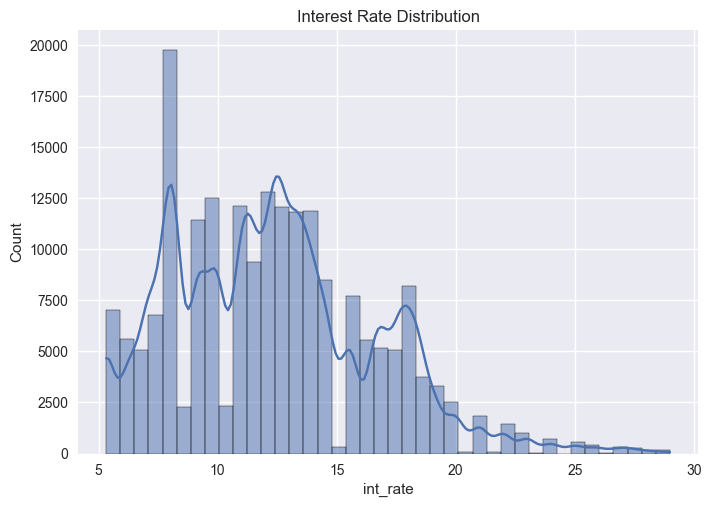

In [17]:
sns.histplot(df['int_rate'], bins=40, kde=True)
plt.title("Interest Rate Distribution")
plt.show()


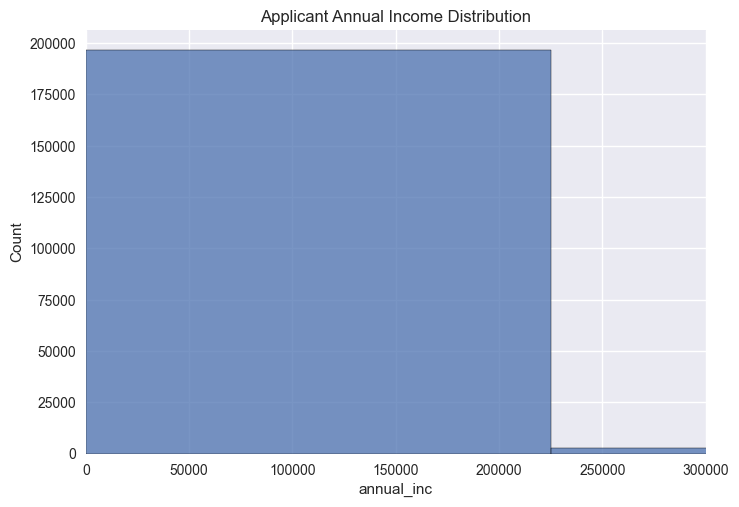

In [18]:
sns.histplot(df['annual_inc'], bins=40)
plt.xlim(0, 300000)   
plt.title("Applicant Annual Income Distribution")
plt.show()


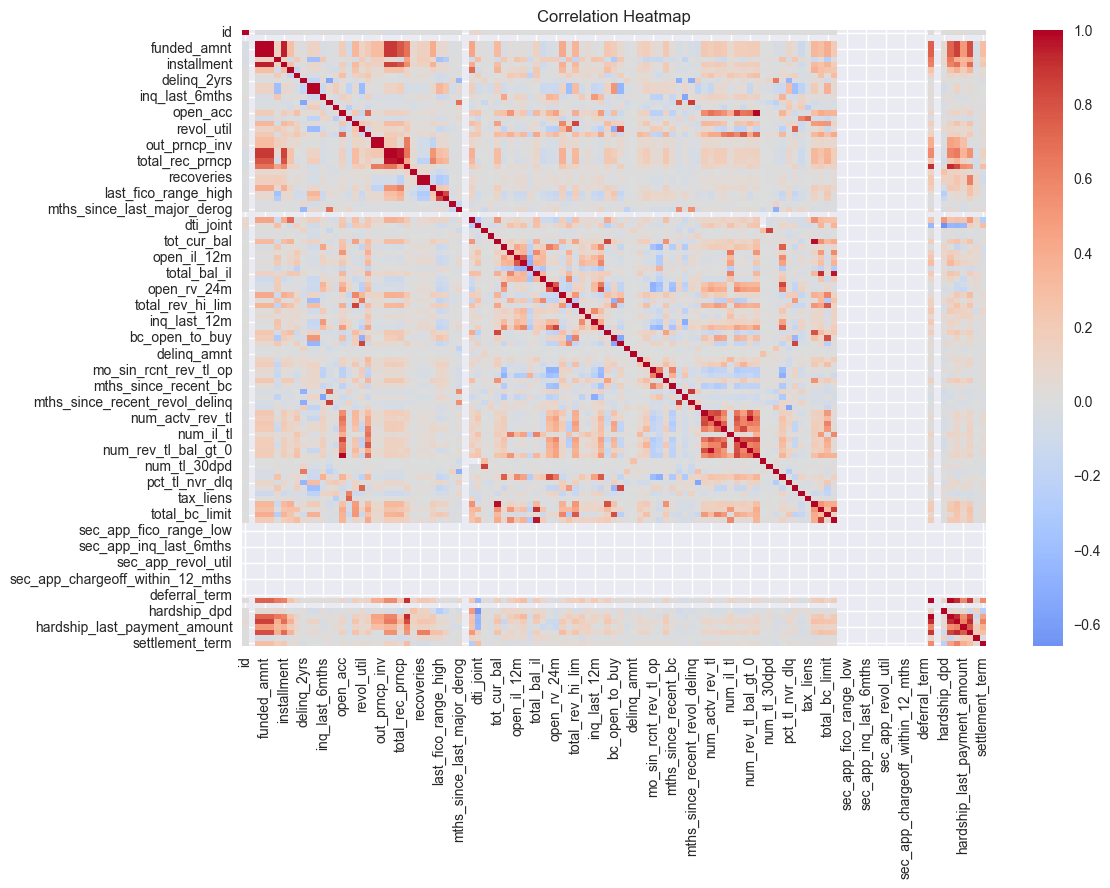

In [19]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()
